# **Ex1 - Unsupervised learning**

In this assignemnt you will practice unsupervised methods we saw in class, and specifically running K-means and visualizing the data using PCA.

In this assignment you will learn a few more things:

1.   Load local files
2.   Load data from Kaggle
3. Use Scikit-learn K-means
4. Use Scikit-learn PCA
5. Some visulaization
6. Evaluate the performance of the clustering using Elbow methods, Siouhette analysis and accuracy (as we have true labels)

Note:
* Read the complete task before implementing.
* Reuse code, write functions.

## Import All Packages
Add all imports needed for this notebook to run

In [2]:
import pandas as pd
import sklearn as sci
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import silhouette_score
import seaborn as sns

# Text Clustering And Dimension Reduction

In this exercise you will cluster fake news using `k-means` and visualize the clustering using PCA.

**Import the Fake News Dataset from Kaggle**

Navigate to https://www.kaggle.com. Then go to the [Account tab of your user profile](https://www.kaggle.com/me/account) and select Create API Token. This will trigger the download of kaggle.json, a file containing your API credentials.

Then run the cell below and click the upload button to upload kaggle.json to your Colab runtime.

After uploading the kaggle.json the fake news dataset will be copy to the enviroment in the '/content' directory. You will see the two files 'Fake.csv' and 'True.csv'.

For more about the dataset you can read [here](https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset).

In [3]:
from google.colab import files

# upload kaggle.json file using user prompt
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

# download the dataset
!kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset

# extract the files
!unzip '/content/fake-and-real-news-dataset.zip'

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 62 bytes
 66% 27.0M/41.0M [00:00<00:00, 142MB/s]
100% 41.0M/41.0M [00:00<00:00, 147MB/s]
Archive:  /content/fake-and-real-news-dataset.zip
  inflating: Fake.csv                
  inflating: True.csv                


## 1. Read the csv files and create one single dataframe (5 points)

*   Create a dataframe which is the join of the two files 'Fake.csv' and 'True.csv'.
*   Extract the 'text' column from each dataframe (droping title, subject and date columns).
*   Create a single dataframe containing a text column and a label column (fake=0, real=1).

In [4]:
# Example for reading one file. It will work if the previous step was successful.
face_df = pd.read_csv('/content/Fake.csv')
true_df = pd.read_csv('/content/True.csv')
# fake_df_text = face_df[['text']]
fake_df_text=face_df.loc[:, ['text']] ## creating new data frame baesd on y-axis attribute 'text' of fake dataframe
fake_df_text['label'] = 0 #creating new attribute 'label' with the value 0 for every row in the DF
# print(type(fake_df_text))
true_df_text=true_df.loc[:, ['text']] ## creating new data frame baesd on y-axis attribute 'text' of fake dataframe
true_df_text['label'] = 1   #creating new attribute 'label' with the value 1 for every row in the DF
true_df_text 
fake_true_df = pd.concat([fake_df_text, true_df_text], axis=0) ## merging the rows of both DF's using the same label names
fake_true_df

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
21412,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
21413,"LONDON (Reuters) - LexisNexis, a provider of l...",1
21414,MINSK (Reuters) - In the shadow of disused Sov...,1
21415,MOSCOW (Reuters) - Vatican Secretary of State ...,1


## 2. Cluster the samples into 2 clusters (real and fake) (15 points)

*   Generate TF-IDF features by applying the TfidfVectorizer preprocessor using 1000 features (`max_features=1000`) and remove English stop words.
* Scale the data.
*    Apply k-Means algorithm on the TF-IDF features using n_clusters=2.

In [5]:
corpus = fake_true_df['text'].tolist() 
vectorizer = TfidfVectorizer(max_features=1000) #If stop words = None , no stop words will be used
vectors = vectorizer.fit_transform(corpus) # 44898x1000 sparse matrix
feature_names = vectorizer.get_feature_names_out() # Array of the top 1000 terms ordered by their term frequency
dense = vectors.todense()
denselist = dense.tolist() # Matrix of the tf-idf values
st_scaler = StandardScaler() # Create a StandardScaler object
df_scaled = pd.DataFrame(st_scaler.fit_transform(denselist),columns = feature_names) # Perform standartization on the data, and create a df with the tf-idf and the 1000 relevant features
kmeans = KMeans(n_clusters=2, random_state=10) # K-Means object of 2 clusters
predicted_centroids_list = kmeans.fit_predict(df_scaled) # predicted label for each sample

## 3. Visualize using scatter plot (15 points)
The data is high dimensional, so for visualization purpose, we will perform a dimensionality reduction using PCA.

* Apply PCA
*   Visualize the clustering in 2d using first two PCs.
*   Visualize the clustering in 3d using first three PCs.

Notes:

*   In clustering visualization it's important to also visualize the centroids.
* Visualize using matplotlib scatter function. It can be used to plot 2D or 3D scatter plots.
* Color the points according to the true labels.

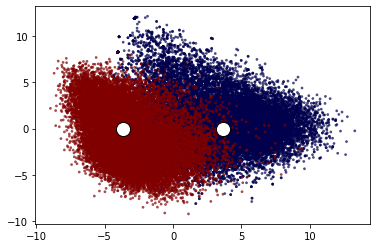

In [6]:
pca_2d = PCA(n_components=2)  ## creating PCA object that reduces the dimensions to 2 dimensions
x=pca_2d.fit_transform(df_scaled) # reduces the The data that has already been normalized from 1000 dimensions to 2.
cluster_centers = kmeans.cluster_centers_ # gets the x and y values of the cluster centers before pca
cluster_centers_after_pca = pca_2d.fit_transform(cluster_centers) # cluster centers after pca
pca_2d_withlabel = pd.DataFrame(x, columns=['pca1','pca2'])
pca_2d_withlabel['label'] = fake_true_df['label'].tolist() # creating new table with pca1,pca2 and the correct labels
plt.scatter(x[:, 0], x[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=pca_2d_withlabel['label'], edgecolor="k",cmap='seismic') ## creating 2d plot,when pc1 is x axis and pc2 is the y axis
plt.scatter(
    cluster_centers_after_pca[:, 0],
    cluster_centers_after_pca[:, 1],
    marker="o",
    c="white",
    alpha=1,
    s=200,
    edgecolor="k",
) # adding the cluster centers to the plot
plt.show()

Illustration of the data in the two-dimensional space according to clusters after pca including marking of the clusters centers

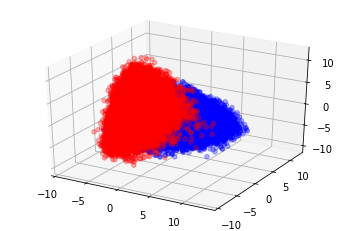

In [7]:
pca_3d = PCA(n_components=3) ## creating PCA object that reduces the dimensions to 2 dimensions
x1 = pca_3d.fit_transform(df_scaled) # reduces the The data that has already been normalized from 1000 dimensions to 3.
pca_3d_withlabel = pd.DataFrame(x1, columns=['pca1','pca2','pca3']) 
pca_3d_withlabel['label'] = fake_true_df['label'].tolist() # creating new table with pca1,pca2,pca3 and the correct labels
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x1[:, 0], x1[:, 1],x1[:, 2],c = pca_3d_withlabel['label'],cmap='bwr',alpha = 0.3)
plt.show()

Illustration of the data in the three-dimensional space according to clusters after pca 

## 4. Performance evaluation (15 points)
### How did our clustering perform against the real labels?

We do have the true lables (fake/real), but we don't know which cluster correspond to which label. Therefore, we check the two options:

*   Define cluster 1 as fake and cluster 2 as real. What is the accuracy?
*   Define cluster 1 as true and cluster 2 as fake. What is the accuracy?

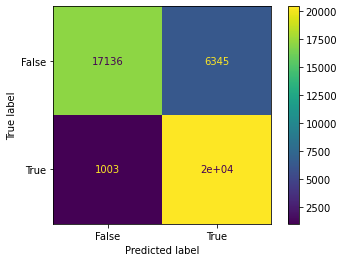

In [8]:
ground_truth = fake_true_df['label'].tolist() ## the real label came with the original data
y_true = ground_truth 
y_pred = predicted_centroids_list # predicted label by the k means estimation
conf_mat = confusion_matrix(y_true, y_pred)  # Create confusion matrix with the actual labels and the predicted labels
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = [False, True])
cm_display.plot()
plt.show()

In [9]:
Accuracy = metrics.accuracy_score(y_true, y_pred)
Accuracy

0.836340148781683

We will turn each label into its opposite value in order to understand which label belongs to which cluster with high probability

In [10]:
reverse_pred_labels =[]
for i in range(len(predicted_centroids_list)):
  if predicted_centroids_list[i] == 0:
    reverse_pred_labels.append(1)
  else:
    reverse_pred_labels.append(0)

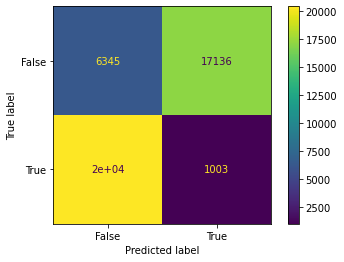

In [11]:
conf_mat2 = confusion_matrix(y_true, reverse_pred_labels)  # Create confusion matrix with the actual labels and the predicted labels
# Plot the confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat2, display_labels = [False, True])
cm_display.plot()
plt.show()

In [12]:
Accuracy_reverse = metrics.accuracy_score(y_true, reverse_pred_labels)
Accuracy_reverse

0.16365985121831708

## 5. Find optimal `k` (10 points)
What is the best k for clustering?

* Cluster using a range of `k` (up to 20) and compare the SSD and the Silhouette values for every k.
* Plot SSD vs. k and Silhouette score vs. k.

Notes:
* You can get the SSD of a clustering using the `inertia_` attribute of the model.
* Silhouette score using `silhouette_score` function from `sklearn.metrics`. This function accept the model and the data.
* Computing Silhouette may takes long time. Estimate the Silhouette using a sample of 300 samples uisng the argument `sample_size=300`.

In [13]:
silhouette_score_values_list = []
SSD_values_list = []

for k in range(2,21):
    curr_kmeans = KMeans(n_clusters=k, random_state=10) # creating Kmeans object
    predicted_centroids_list_for_curr_k = curr_kmeans.fit_predict(df_scaled)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_scaled,predicted_centroids_list_for_curr_k,sample_size=300)
    print("For {} clusters -".format(k),
        "the SSD is:", curr_kmeans.inertia_,
        "and the average Silhouette score is:", silhouette_avg,)
    silhouette_score_values_list.append(silhouette_avg)
    curr_SSD_value = curr_kmeans.inertia_
    SSD_values_list.append(curr_SSD_value)

For 2 clusters - the SSD is: 44322805.89520267 and the average Silhouette score is: 0.014931002083513348
For 3 clusters - the SSD is: 44061559.14677286 and the average Silhouette score is: 0.006782280820951806
For 4 clusters - the SSD is: 43873885.943890855 and the average Silhouette score is: 0.0024099337186522913
For 5 clusters - the SSD is: 43712592.371439025 and the average Silhouette score is: 0.007877805301526137
For 6 clusters - the SSD is: 43578082.53917655 and the average Silhouette score is: 0.00541757160411297
For 7 clusters - the SSD is: 43441974.5424131 and the average Silhouette score is: -0.0020860359680330855
For 8 clusters - the SSD is: 43308299.83793531 and the average Silhouette score is: -0.004336162812141495
For 9 clusters - the SSD is: 43206775.28027183 and the average Silhouette score is: -0.012181307707484757
For 10 clusters - the SSD is: 43085146.18403162 and the average Silhouette score is: 0.004660011609662562
For 11 clusters - the SSD is: 42989749.82941854 a

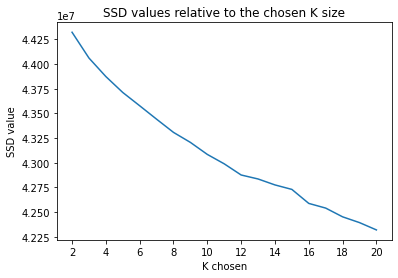

In [14]:
fig = plt.figure()
ax = plt.axes()
# SSD vs. k
x = [i for i in range(2,21)]
plt.xticks([2,4,6,8,10,12,14,16,18,20])
plt.title("SSD values relative to the chosen K size")
plt.xlabel("K chosen")
plt.ylabel("SSD value")
ax.plot(x,SSD_values_list)

As we can see, as K increases, the sum of square distance decreases.

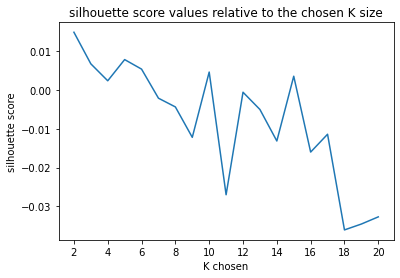

In [15]:
fig = plt.figure()
ax = plt.axes()
# silhouette_score vs. k
x = [i for i in range(2,21)]
plt.xticks([2,4,6,8,10,12,14,16,18,20])
plt.title("silhouette score values relative to the chosen K size")
plt.xlabel("K chosen")
plt.ylabel("silhouette score")
ax.plot(x,silhouette_score_values_list )

As we can see, the best silhouette score is when k=2

### 6. What is the optimal k for clustering? (10 points)

* Explain.
* If optimal k!=2 what can be a good explanation for this?

As K increases, the sum of square distance decreases. This is consistent with logic, because as we increase the number of clusters, then each cluster will contain fewer points, therefore the distribution of points surrounding a certain center will be smaller, which means the variance will decrease. In the end, our goal is to find the sweet spot where we have medium variance and medium bias and not to keep reducing the SSD ad infinitum.

Regarding silhouette score, you can see that for K=2 the best result is obtained, which corresponds with the real data because it does consist of only 2 labels.

A good answer to why K=!2 can also return good results is that increasing K causes a decrease in the variation between the points in the same cluster and a proportional increase in the distance between points in different clusters

# 7. PCA then k-means (10 points)

This time, lets try to change the order.
1. Generate TF-IDF 1000 features
2. Run PCA (using all dimenssions)
3. Run k-means
4. Plot 2D and 3D scatter plots
5. Estimate the accuracy according to true labels.
6. Explain how is it compared to the previous approach, where clustering is performed w/o PCA.

Note:
* When you compute the PCA, don't limit to first PCs, but use all of them.

In [16]:
pca_1000d = PCA(n_components=1000) # Perform PCA using all dimensions
data_1000d_after_pca =pca_1000d.fit_transform(df_scaled) # reduces the The data that has already been normalized from 1000 dimensions to 2.
Kmeans_for_1000d = KMeans(n_clusters=2, random_state=10) # K-Means of 2 clusters for the new 1000 features df
Kmeans_model_1000D_fit = Kmeans_for_1000d.fit(data_1000d_after_pca)
new_cluster_centers = Kmeans_for_1000d.cluster_centers_

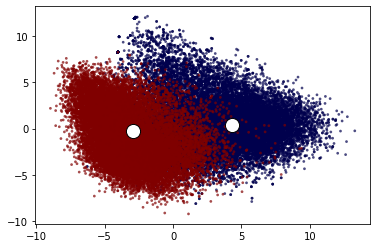

In [17]:
plt.scatter(data_1000d_after_pca[:, 0], data_1000d_after_pca[:, 1], marker=".", s=30,cmap='seismic', lw=0, alpha=0.7, c=pca_2d_withlabel['label'], edgecolor="k") ## creating 2d plot,when pc1 is x axis and pc2 is the y axis
plt.scatter(
    new_cluster_centers[:, 0],
    new_cluster_centers[:, 1],
    marker="o",
    c="white",
    alpha=1,
    s=200,
    edgecolor="k",
) # adding the cluster centers to the plot
plt.show()

##### Visualize the clustering in 2 dimensions using first two PCs

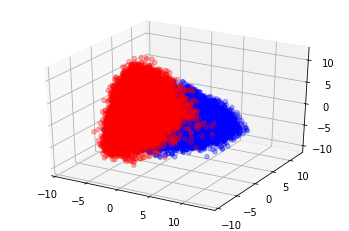

In [18]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(data_1000d_after_pca[:, 0], data_1000d_after_pca[:, 1],data_1000d_after_pca[:, 2],c = pca_3d_withlabel['label'],cmap='bwr',alpha = 0.3)
plt.show()

##### Visualize the clustering in 3 dimensions using first three PCs

In [19]:
# Define cluster 1 as fake and cluster 2 as real (fake = 0, real = 1)
predicted_centroids_list_after1000d_Kmeans = Kmeans_for_1000d.fit_predict(data_1000d_after_pca)
y_pred = predicted_centroids_list_after1000d_Kmeans
confusion_matrix(y_true, y_pred)
## Accuracy measures
Accuracy = metrics.accuracy_score(y_true, y_pred)
Accuracy

0.836340148781683

In [20]:
# Define cluster 2 as fake and cluster 1 as real (fake = 1, real = 0)
new_reverse_pred_labels =[]
for i in range(len(predicted_centroids_list_after1000d_Kmeans)):
  if predicted_centroids_list_after1000d_Kmeans[i] == 0:
    new_reverse_pred_labels.append(1)
  else:
    new_reverse_pred_labels.append(0)

In [21]:
Accuracy_reverse = metrics.accuracy_score(y_true, new_reverse_pred_labels)
Accuracy_reverse

0.16365985121831708


6. 
If we examine the approaches, the first approach we carried out was first to perform KMEANS on the original data and only after that, to do PCA to reduce the dimensions to 2D or 3D.
In contrast, the second approach was to first perform PCA on the entire data and only after that, run the Kmeans algorithm.
It is possible to notice that there is no difference in the final results of these cases both in the plots (divided into the same clusters) and in the accuracy score.
This is because PCA passes all points without exception the same transformation.
In the end, we will take from the PCA the 2/3 of the eigenvectors with the highest variance, so even if the values themselves have undergone some kind of transformation, there is no change in the similarity between the points.

# MNIST clustering (10 points)
Redo the same analysis, but this time using the MNIST data set. Notice that this time there are actually 10 'true' clusters.

1. What is the accuracy of the clustering when using k=10? \\
   * When for computing the accuracy of 10 classes, first you need to define what is the label of each cluster. Do that by majority votes. In theory, you may get two or more clusters with the same labels. We will ignore that for now. Meaning that you don't need to bother in case there are two clusters with the same label according to the majority vote. Simply count what is the fraction of 'other' digits in each cluster.
2. What is the optimal k?
3. How do the results changes if you first run PCA?

In [22]:
!kaggle datasets download -d zalando-research/fashionmnist
!unzip '/content/fashionmnist.zip'
mnist_df = pd.read_csv(r'/content/fashion-mnist_train.csv')

 87% 60.0M/68.8M [00:00<00:00, 214MB/s]
100% 68.8M/68.8M [00:00<00:00, 211MB/s]
Archive:  /content/fashionmnist.zip
  inflating: fashion-mnist_test.csv  
  inflating: fashion-mnist_train.csv  
  inflating: t10k-images-idx3-ubyte  
  inflating: t10k-labels-idx1-ubyte  
  inflating: train-images-idx3-ubyte  
  inflating: train-labels-idx1-ubyte  


In [23]:
labels_list = mnist_df['label']
mnist_df_features = mnist_df.drop("label", axis='columns')
mnist_kmeans = KMeans(n_clusters=10, random_state=10) # K-Means of 10 clusters since we have 10 true labels in the dataset
predicted_mnist_labels = mnist_kmeans.fit_predict(mnist_df_features)

In [24]:
mnist_df['pred_labels'] = predicted_mnist_labels # creating new attribute of pred_labels from the kmens for each sample

In [25]:
clusters_array = [] # each array will hold a DataFrame which his index will indicate the predicted label of the sampels
outer_array = []
df_dict= {} # each value holds all the records with the majority label of the key
counts_array = []
for idx in range(10):
  clusters_array.append(mnist_df.loc[(mnist_df['pred_labels'] == idx)])
  most_freq_label = clusters_array[idx]['label'].value_counts().idxmax() # the most common label in the sub-DF
  clusters_array[idx].loc[:, ['majority label']] = most_freq_label # changing the label by the most common one
  most_freq_label_int = int(clusters_array[idx]['label'].value_counts().idxmax())
  if most_freq_label_int not in df_dict:
    df_dict[most_freq_label_int] = clusters_array[idx]
  else:
    df_dict[most_freq_label_int] = pd.concat([df_dict[most_freq_label_int], clusters_array[idx]], axis=0)

l = [np.array([0 for _ in range(10)]) for i in range(10)]
# Inserts in the appropriate place the number of occurrences of the real label in the SUB-DF of that majority label = x
for x in range(10):
  for g in range(10):
    try:
      l[x][df_dict[x]['label'].value_counts().index.tolist()[g]] = df_dict[x]['label'].value_counts().values.tolist()[g] 

    except:
      pass  

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [26]:
confusion_m = []
for i in range(10):
  if sum(l[i]) == 0:
    confusion_m.append(l[i])
    continue  
  confusion_m.append(l[i]/sum(l[i]))  

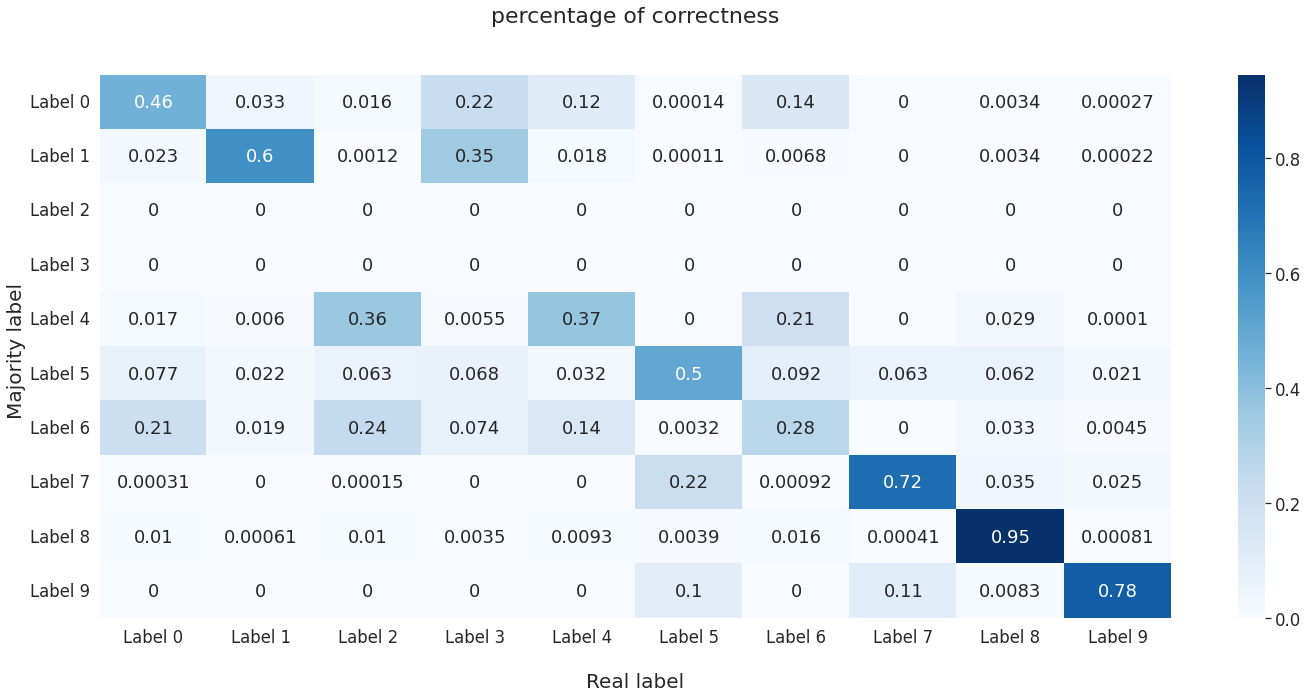

In [27]:
confusion_m = np.array(confusion_m)
labels = ['Label 0','Label 1','Label 2','Label 3','Label 4','Label 5','Label 6','Label 7','Label 8','Label 9',]
df_confusion = pd.DataFrame(confusion_m, index = labels, columns=labels)

plt.figure(figsize=(24, 10))

sns.set(font_scale = 1.5)
ax = sns.heatmap(df_confusion, annot=True, cmap='Blues')    
ax.set_title('percentage of correctness\n\n',size=22)
ax.set_xlabel('\nReal label',size=20)
ax.set_ylabel('Majority label ', size=20)

plt.show()

In [28]:
labels_list = mnist_df['label']
mnist_df_features = mnist_df.drop("label", axis='columns')
acc_list = []
SSD_values_list = []
for every_k in range(2,15):
  mnist_kmeans = KMeans(n_clusters=every_k, random_state=10)
  predicted_mnist_labels = mnist_kmeans.fit_predict(mnist_df_features)
  mnist_df['pred_labels'] = predicted_mnist_labels
  clusters_array = [] # each array will hold a DataFrame which his index will indicate the predicted label of the sampels
  outer_array = []
  df_dict= {} # each value holds all the records with the majority label of the key
  counts_array = []
  for idx in range(every_k):
    clusters_array.append(mnist_df.loc[(mnist_df['pred_labels'] == idx)])
    most_freq_label = clusters_array[idx]['label'].value_counts().idxmax() # the most common label in the sub-DF
    clusters_array[idx].loc[:, ['majority label']] = most_freq_label # changing the label by the most common one
    most_freq_label_int = int(clusters_array[idx]['label'].value_counts().idxmax())
    if most_freq_label_int not in df_dict:
      df_dict[most_freq_label_int] = clusters_array[idx]
    else:
      df_dict[most_freq_label_int] = pd.concat([df_dict[most_freq_label_int], clusters_array[idx]], axis=0)
  l = [np.array([0 for _ in range(every_k)]) for i in range(every_k)]
  # Inserts in the appropriate place the number of occurrences of the real label in the SUB-DF of that majority label = x
  for x in range(every_k):
    for g in range(every_k):
      try:
        l[x][df_dict[x]['label'].value_counts().index.tolist()[g]] = df_dict[x]['label'].value_counts().values.tolist()[g] 

      except:
        pass

  connected = pd.concat([x for x in clusters_array], axis=0)
  y_pred = connected['majority label'].tolist()
  y_true = labels_list
  Accuracy = metrics.accuracy_score(y_true, y_pred)
  acc_list.append(Accuracy)
  curr_SSD_value = mnist_kmeans.inertia_
  SSD_values_list.append(curr_SSD_value)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

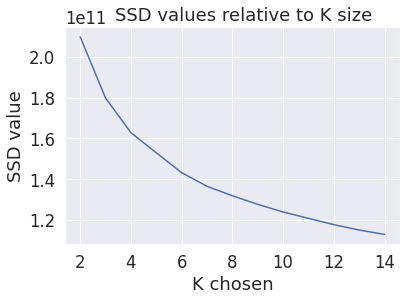

In [29]:
fig = plt.figure()
ax = plt.axes()

x = [i for i in range(2,15)]
plt.xticks([2,4,6,8,10,12,14,16,18,20])
# ax.set_xticklabels(rotation = (45), fontsize = 10, va='bottom', ha='left')
plt.title("    SSD values relative to K size")
plt.xlabel("K chosen")
plt.ylabel("SSD value")
ax.plot(x,SSD_values_list )
plt.show()

As we can see, as K increases, the sum of square distance decreases.

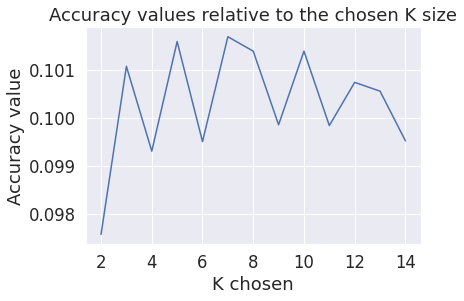

In [30]:
fig = plt.figure()
ax = plt.axes()

x = [i for i in range(2,15)]
plt.xticks([2,4,6,8,10,12,14,16,18,20])
# ax.set_xticklabels(rotation = (45), fontsize = 10, va='bottom', ha='left')
plt.title("Accuracy values relative to the chosen K size")
plt.xlabel("K chosen")
plt.ylabel("Accuracy value")
ax.plot(x,acc_list )
plt.show()

2. It seems based on the results that K=7 will be the right choice for this case. 
Its accuracy score is the highest, and it is at an elbow point better than K=5 in the plot describing the SSD as a function of K

3.
The results wouldn't changed if we performed PCA before KMEANS. 
This is because PCA passes all points without exception the same transformation.
we will take from the PCA the K eigenvectors with the highest variance, so even if the values themselves have undergone some kind of transformation, there is no change in the similarity between the points.

# Compute projection (10 points)
**Notice:** No code required in this section.

Given the next PCA projection matrix
$\begin{pmatrix}
1 & 1\\
2 & -1
\end{pmatrix}$
And the correspoding egienvalues
$(5, -1)$

Compute the projection to one dimension of the next two vectors:
\begin{pmatrix}
1 & 3
\end{pmatrix}
\begin{pmatrix}
3 & 7
\end{pmatrix}

The answer:

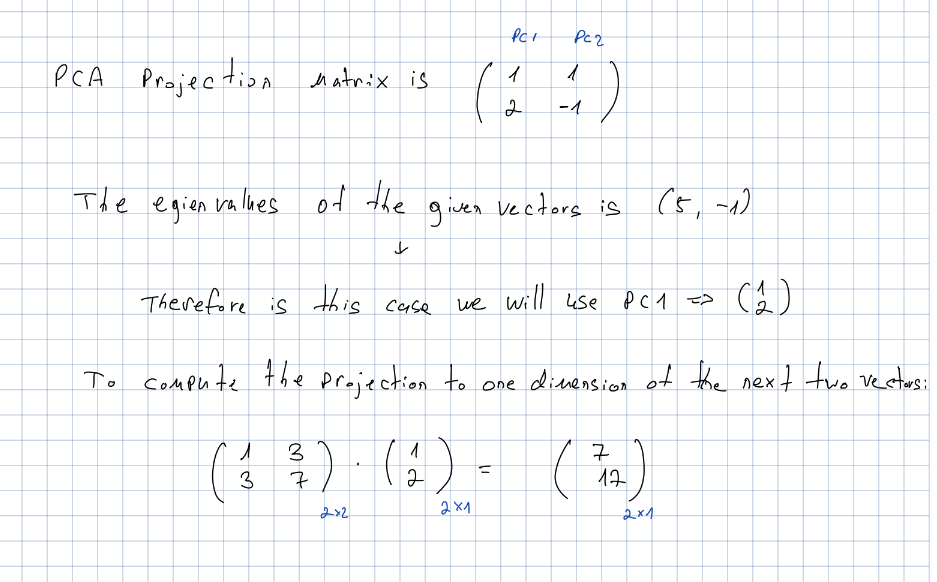